# **Potato Disease Classification using CNN**
Overview
This project aims to classify potato leaf images into three categories:



*   Potato___Late_blight: Leaves affected by late blight disease
*   Potato___Early_blight: Leaves affected by early blight disease.
*   Potato___healthy: Healthy potato leaves





The project uses a* Convolutional Neural Network (CNN)* built with TensorFlow and Keras to automatically detect and classify potato diseases based on leaf images. This can help farmers identify diseases early and take appropriate action to protect their crops.

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("faysalmiah1721758/potato-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/faysalmiah1721758/potato-dataset/versions/1


In [9]:
import os

# List the contents
for root, dirs, files in os.walk(path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {len(files)} files - {files[:5]}")

Root: /root/.cache/kagglehub/datasets/faysalmiah1721758/potato-dataset/versions/1
Directories: ['Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight']
Files: 0 files - []
Root: /root/.cache/kagglehub/datasets/faysalmiah1721758/potato-dataset/versions/1/Potato___healthy
Directories: []
Files: 152 files - ['8b2ce6b6-f00a-4f25-ac6d-4249dd7dc5f6___RS_HL 1890.JPG', '1b434c52-7be4-40c4-90d5-13220f1a3eba___RS_HL 5418.JPG', '762672f4-17e6-4fd6-84f1-3bcb091b3ca5___RS_HL 5417.JPG', '849aa978-c7b9-4344-9ca8-129219a65f8e___RS_HL 1874.JPG', 'c3caa84b-6078-4489-80ac-919d92d25ff7___RS_HL 1772.JPG']
Root: /root/.cache/kagglehub/datasets/faysalmiah1721758/potato-dataset/versions/1/Potato___Late_blight
Directories: []
Files: 1000 files - ['af13137c-1561-4c1c-b85b-5ec8930f2b38___RS_LB 5425.JPG', '76ebfd7a-b3d8-4cde-b6b6-7e5132ec269b___RS_LB 4935.JPG', 'ad2396a9-306e-4ca9-88dc-56b2bde77c6b___RS_LB 2755.JPG', '67001c81-d182-4bc6-b9b8-f25ddb0a2db4___RS_LB 5231.JPG', '29bfc55a-8cb2-4938-b0b5-5e

In [10]:
#handle imports
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


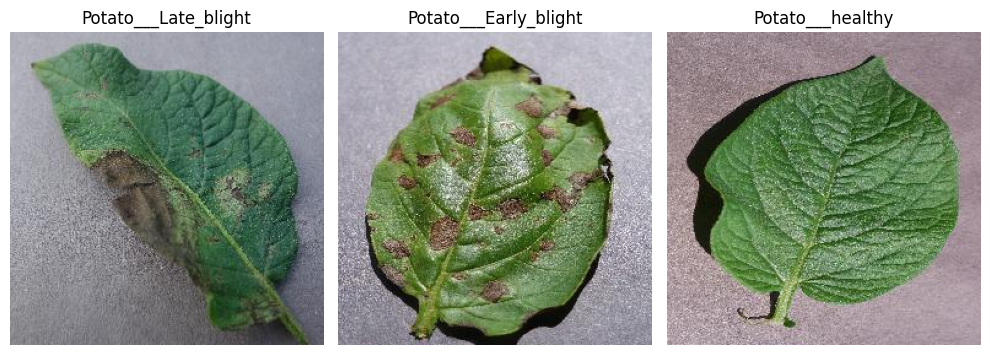

In [11]:

# List of classes
classes = ["Potato___Late_blight", "Potato___Early_blight", "Potato___healthy"]

# Create a figure to display the images
plt.figure(figsize=(10, 5))

# Loop through each class and display one image
for i, class_name in enumerate(classes):
    # Get the path to the class directory
    class_path = os.path.join(path, class_name)

    # List all files in the class directory
    image_files = os.listdir(class_path)

    # Select the first image (or any specific image)
    image_path = os.path.join(class_path, image_files[0])

    # Load the image
    image = imread(image_path)

    # Display the image
    plt.subplot(1, 3, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis("off")

# Show the plot
plt.tight_layout()
plt.show()

In [4]:
#rescale the images and define the batchsize
batchsize = 32
imgH,imgW = 256,256

#data generators with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2,
                                   )
#training data
training = train_datagen.flow_from_directory(path,
                                            target_size=(imgH,imgW),
                                            batch_size=batchsize,
                                            class_mode='categorical',
                                            subset = 'training',
                                            seed=42)
#validation data
validation = train_datagen.flow_from_directory(path,
                                            target_size=(imgH,imgW),
                                            batch_size=batchsize,
                                            class_mode='categorical',
                                            subset = 'validation',
                                            seed=42)

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [5]:
#model
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(imgH,imgW,3)),   #input layer
    MaxPooling2D(2,2),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(264,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),

    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(3,activation='softmax')  #output layer

])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 264)         │         304,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 264)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51744)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,623,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,029,451 (26.82 MB)

 Trainable params: 7,029,451 (26.82 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#add an early stopping to ensure that model stops and restores best weights when validation accuracy doesnt improve
earlyStopping = EarlyStopping(monitor='val_accuracy',patience=5,verbose=1,mode='max',restore_best_weights=True)

# fit the model
history  = model.fit(training,
                    epochs=100,
                    batch_size=batchsize,
                    validation_data=validation,
                    callbacks=[earlyStopping])


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 709ms/step - accuracy: 0.4221 - loss: 1.0179 - val_accuracy: 0.5907 - val_loss: 0.7571
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 558ms/step - accuracy: 0.5996 - loss: 0.8434 - val_accuracy: 0.8023 - val_loss: 0.5507
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 542ms/step - accuracy: 0.7702 - loss: 0.6123 - val_accuracy: 0.8442 - val_loss: 0.4507
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 558ms/step - accuracy: 0.8347 - loss: 0.4581 - val_accuracy: 0.8651 - val_loss: 0.3361
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 544ms/step - accuracy: 0.8493 - loss: 0.3733 - val_accuracy: 0.8953 - val_loss: 0.2771
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 559ms/step - accuracy: 0.8742 - loss: 0.3508 - val_accuracy: 0.8907 - val_loss: 0.2467
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 541ms/step - accuracy: 0.8922 - loss: 0.2585 - val_accuracy: 0.8860 - val_loss: 0.2431
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 574ms/step - accuracy: 0.9063 - loss: 0.2582 - 

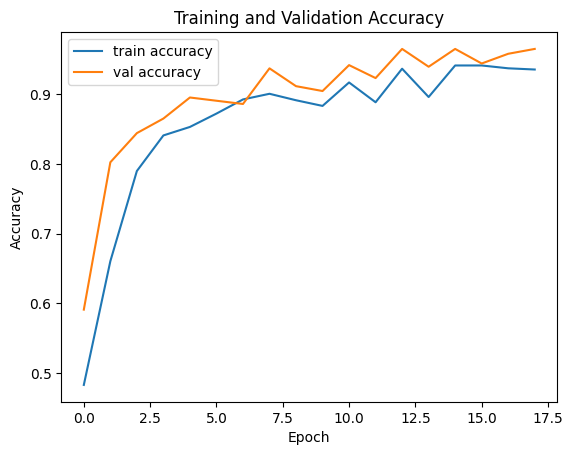

In [7]:
#plot the train and val accuracy

plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#

# Results
The model achieves the following performance:

Training Accuracy: ~94.57%.

Validation Accuracy: ~96.51%.

Validation Loss: ~0.1067.

Early stopping was used to prevent overfitting, and the best model weights were restored at epoch 13.